In [1]:
import numpy as np
import pandas as pd
import math
import itertools 
from scipy import stats
import time

#matplotlib libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import seaborn as sns

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics, cross_validation
from prophet.plot import plot_cross_validation_metric

## Forecasting Pipeline

In [2]:
sale_df = pd.read_csv(r"C:\Users\cecil\OneDrive\Desktop\Projects\data\timesales_train.csv") 
sale_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
#Total Sales Revenue 
prod_total_sale = sale_df.groupby(by = ['date', 'family']).agg({'sales': 'sum'}).reset_index().sort_values(by = ['family', 'date'])

#Changing long to wide-format
prod_sales = prod_total_sale.pivot(index="date", columns="family", values="sales")
prod_sales.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,71.09000,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.0,0.0,0.000000
2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,15754.50000,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.0,0.0,1526.750002
2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,11172.45500,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.0,0.0,1094.310994
2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,10143.20900,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.0,0.0,1293.120995
2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,13734.94501,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.0,0.0,1245.637004


### Data Cleaning
There are a few methods to account for when cleaning data:

1. Remove low-volume data that can't be used for predictions (Visually inspect or count data)
2. Remove outliers in data (Can perform z-score standardization and drop outliers, or Prophet can naturally deal by inputation, predicting values)
3. Analyze then Deal with missing data (testing randomness, dropping, inputing, etc.) 

We would like categories which have higher sales volumes to use for our models. Outliers 3 standard deviations for the mean will be removed. We noticed that in our earlier EDA that there are abnormal dips in data near the end of December.

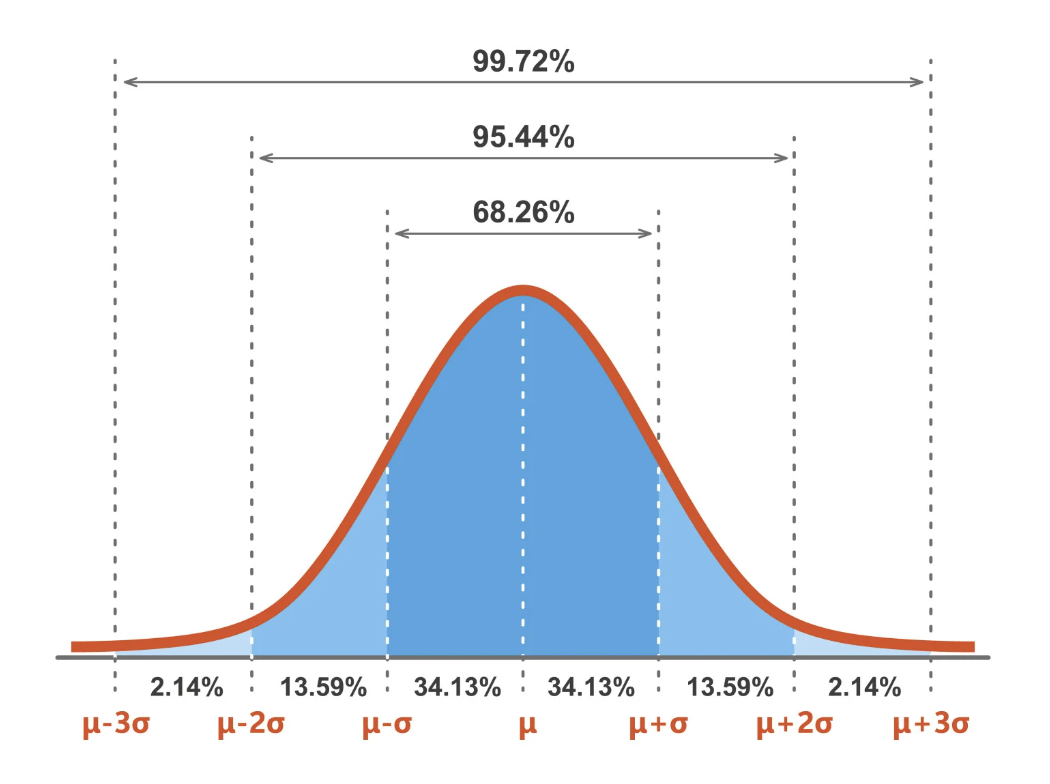

In [ ]:
#Drop categories Where mean sales is less than $1000
def remove_low_data():

    #Apply

#Remove Outliers by Z-score for each Category. 